In [3]:
import os
os.chdir('../')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
waves_norm = np.load('/Volumes/OTHERS/Doktorat/Essen/debug_data/waves_norm.npy')

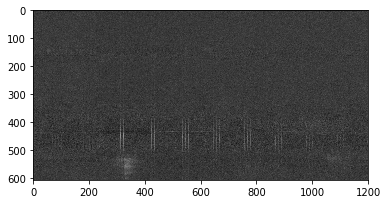

In [12]:
plt.imshow(waves_norm[:,560,:], cmap='gray', vmin=0, vmax=255)

In [9]:
waves_norm.shape

(608, 960, 1200)